In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# CHANGE THIS
r = 102303701   # <-- your university roll number


In [5]:
data = pd.read_csv("data/city_day.csv", encoding="latin1")


C:\Users\beere\AppData\Local\Temp\ipykernel_13852\410897148.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/city_day.csv", encoding="latin1")


In [6]:
print(data.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [8]:
x = data["no2"].dropna().values
x

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ], shape=(419509,))

In [11]:
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)


a_r = 0.15000000000000002
b_r = 0.6


In [13]:
z = x + a_r * np.sin(b_r * x)
z

array([17.27256035,  6.86926363, 28.35239025, ..., 45.14345639,
       49.85179526, 46.09365657], shape=(419509,))

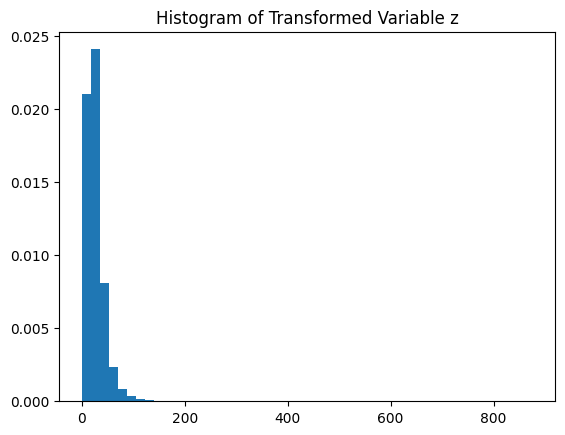

In [14]:
plt.hist(z, bins=50, density=True)
plt.title("Histogram of Transformed Variable z")
plt.show()


In [15]:
mu = np.mean(z)
print("mu =", mu)


mu = 25.811446214420034


In [16]:
variance = np.var(z)
lam = 1 / (2 * variance)

print("lambda =", lam)


lambda = 0.0014605519159744307


In [17]:
c = np.sqrt(lam / np.pi)
print("c =", c)


c = 0.021561727995208047


In [18]:
print("Final Parameters:")
print("lambda =", lam)
print("mu =", mu)
print("c =", c)


Final Parameters:
lambda = 0.0014605519159744307
mu = 25.811446214420034
c = 0.021561727995208047


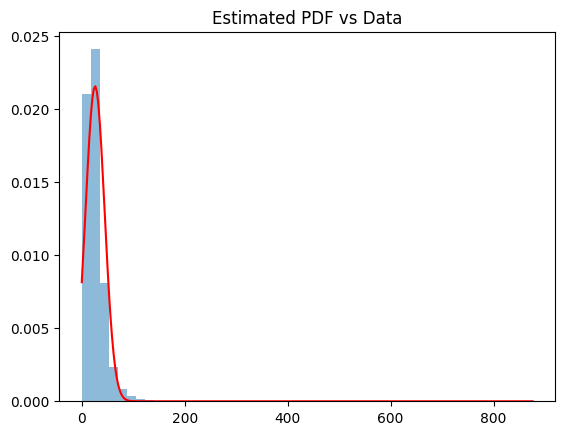

In [19]:
z_range = np.linspace(min(z), max(z), 300)
pdf = c * np.exp(-lam * (z_range - mu)**2)

plt.hist(z, bins=50, density=True, alpha=0.5)
plt.plot(z_range, pdf, 'r')
plt.title("Estimated PDF vs Data")
plt.show()


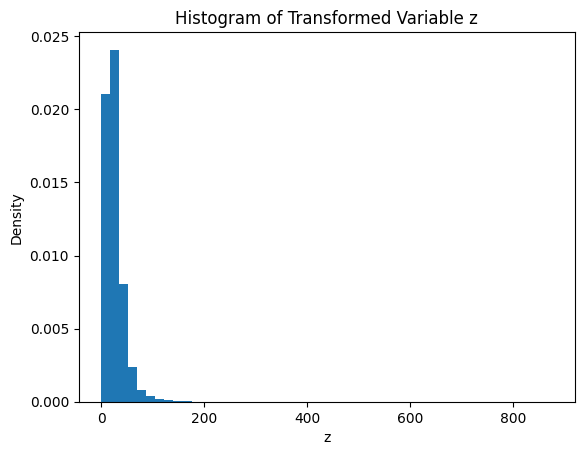

In [20]:
plt.hist(z, bins=50, density=True)
plt.title("Histogram of Transformed Variable z")
plt.xlabel("z")
plt.ylabel("Density")
plt.savefig("outputs/histogram_z.png", dpi=300, bbox_inches="tight")
plt.show()


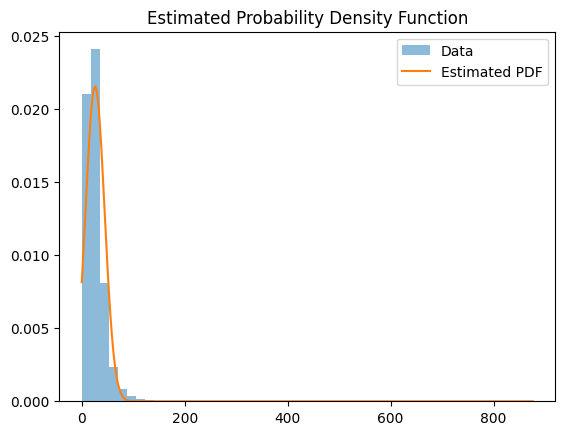

In [21]:
plt.hist(z, bins=50, density=True, alpha=0.5, label="Data")
plt.plot(z_range, pdf, label="Estimated PDF")
plt.legend()
plt.title("Estimated Probability Density Function")
plt.savefig("outputs/pdf_fit.png", dpi=300, bbox_inches="tight")
plt.show()
